In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('Online_Retail.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.isnull().sum() #Checking for missing values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<AxesSubplot:>

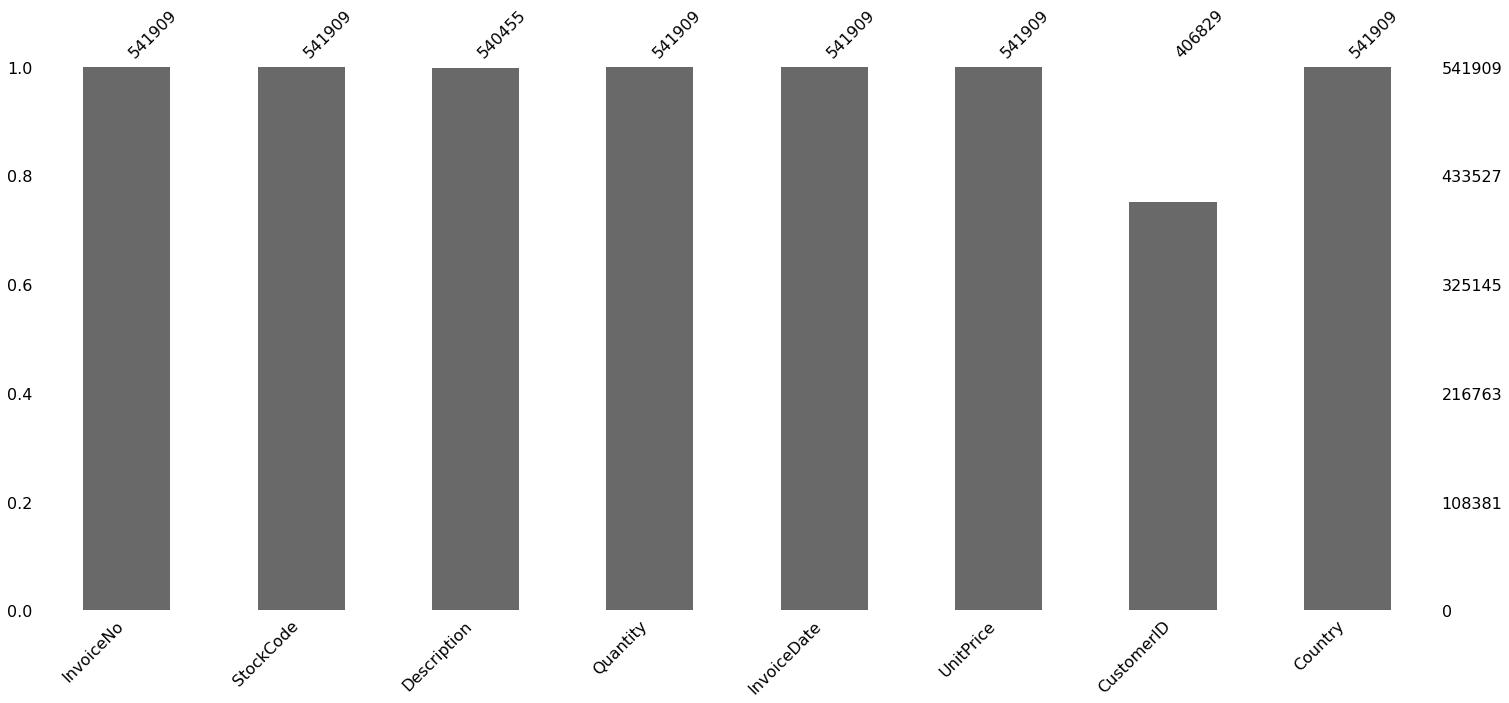

In [7]:
msno.bar(df)

In [8]:
df1 = df.dropna(subset= 'CustomerID', axis=0) #Deleting all the missing records of CustomerID column

In [9]:
df1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
df1.shape

(406829, 8)

In [11]:
df1['Quantity'].min() #Checking for cancelled orders

-80995

In [12]:
sum(df1['Quantity']<0)

8905

In [13]:
sum(df1['UnitPrice']<0)

0

In [14]:
df2 = df1[(df1['Quantity']>0)]
df2.shape

(397924, 8)

In [15]:
df2.duplicated().sum() #Checking for duplicate rows

5192

In [16]:
df2.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [17]:
df_cohort = df2.reset_index(drop=True)
df_cohort

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
397919,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
397920,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
397921,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
397922,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [18]:
df_cohort['Country'].value_counts().nlargest()

United Kingdom    354345
Germany             9042
France              8342
EIRE                7238
Spain               2485
Name: Country, dtype: int64

In [19]:
df_cohort.groupby('Description')['Quantity'].sum().nlargest(5)  

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
Name: Quantity, dtype: int64

# Cohort Analysis

In [20]:
#Function to strip year, month and first day of the month
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [21]:
df_cohort['TransMonth'] = df_cohort['InvoiceDate'].apply(get_month)
df_cohort['TransMonth']

0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
397919   2011-12-01
397920   2011-12-01
397921   2011-12-01
397922   2011-12-01
397923   2011-12-01
Name: TransMonth, Length: 397924, dtype: datetime64[ns]

In [22]:
#Extracting first transaction date of each customer
df_cohort['CohortMonth'] = df_cohort.groupby('CustomerID')['TransMonth'].transform('min')
df_cohort

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
397919,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01
397920,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01
397921,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01
397922,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01


In [23]:
#Function to separate date, month and year
def get_date(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [24]:
trans_year, trans_month, _ = get_date(df_cohort, 'TransMonth')
cohort_year, cohort_month, _ = get_date(df_cohort, 'CohortMonth')

In [25]:
trans_month[:10]

0    12
1    12
2    12
3    12
4    12
5    12
6    12
7    12
8    12
9    12
Name: TransMonth, dtype: int64

In [26]:
trans_year[:10]

0    2010
1    2010
2    2010
3    2010
4    2010
5    2010
6    2010
7    2010
8    2010
9    2010
Name: TransMonth, dtype: int64

In [27]:
years_diff = trans_year - cohort_year
month_diff = trans_month - cohort_month

In [28]:
df_cohort['CohortIndex'] = years_diff * 12 + month_diff + 1
df_cohort

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TransMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...,...
397919,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01,5
397920,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01,5
397921,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
397922,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5


In [29]:
cohort_data = df_cohort.groupby(['CohortMonth','CohortIndex'])['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_data

,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1,885
1,2010-12-01,2,324
2,2010-12-01,3,286
3,2010-12-01,4,340
4,2010-12-01,5,321
...,...,...,...
86,2011-10-01,2,86
87,2011-10-01,3,41
88,2011-11-01,1,324
89,2011-11-01,2,36


In [30]:
#Creating a pivot table
cohort_counts = cohort_data.pivot_table(index='CohortMonth', columns='CohortIndex', values='CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Retention Rate

In [31]:
#Diving each column of the pivot table by the first column
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)

In [32]:
retention.round(3)*100 #rounding off the retention to 3 decimal places and taking percentage 

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,36.6,32.3,38.4,36.3,39.8,36.3,34.9,35.4,39.5,37.4,50.3,26.6
2011-01-01,100.0,22.1,26.6,23.0,32.1,28.8,24.7,24.2,30.0,32.6,36.5,11.8,NaN
2011-02-01,100.0,18.7,18.7,28.4,27.1,24.7,25.3,27.9,24.7,30.5,6.8,NaN,NaN
2011-03-01,100.0,15.0,25.2,19.9,22.3,16.8,26.8,23.0,27.9,8.6,NaN,NaN,NaN
2011-04-01,100.0,21.3,20.3,21.0,19.7,22.7,21.7,26.0,7.3,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.0,17.3,17.3,20.8,23.2,26.4,9.5,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.4,15.7,26.4,23.1,33.5,9.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.1,20.7,22.3,27.1,11.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.7,24.9,24.3,12.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
retention_index = retention.index.strftime('%Y-%m')
retention_index

Index(['2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05',
       '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11',
       '2011-12'],
      dtype='object', name='CohortMonth')

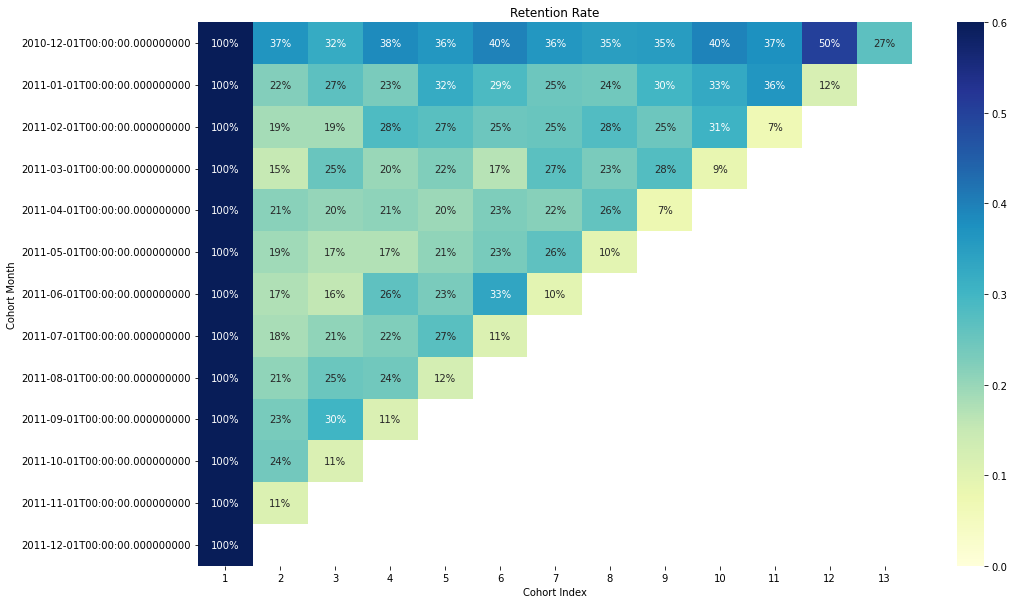

In [34]:
plt.figure(figsize=(16,10))
sns.heatmap(retention, annot=True, fmt='.0%', vmin=0.0, vmax=0.6, cmap='YlGnBu')
plt.title('Retention Rate')
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.show()

# RFM Modelling

In [35]:
df_rfm = df2.reset_index(drop=True)

In [36]:
df_rfm['Total'] = df_rfm['Quantity'] * df_rfm['UnitPrice']
df_rfm

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
397919,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
397920,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
397921,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
397922,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [37]:
df_rfm['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [38]:
latest_date = dt.datetime(2011,12,10) #Setting latest date as last invoice date

#Creating RFM modelling scores
RFMscores = df_rfm.groupby('CustomerID').agg({'InvoiceDate': lambda x: (latest_date-x.max()).days, 'InvoiceNo': lambda x: len(x),
                                             'Total': lambda x: x.sum()})

RFMscores['InvoiceDate'] = RFMscores['InvoiceDate'].astype(int)

RFMscores.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'Total': 'Monetary'}, inplace=True)

RFMscores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [39]:
RFMscores['Recency'].describe() #Descriptive statistics

count    4339.000000
mean       92.041484
std       100.007757
min         0.000000
25%        17.000000
50%        50.000000
75%       141.500000
max       373.000000
Name: Recency, dtype: float64

<AxesSubplot:xlabel='Recency', ylabel='Density'>

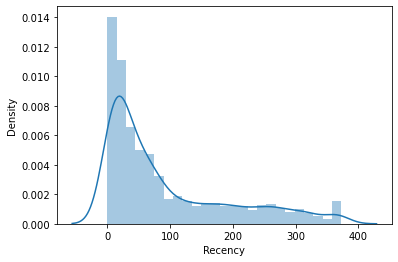

In [40]:
sns.distplot(RFMscores['Recency']) #Recency distribution plot

In [41]:
RFMscores['Frequency'].describe() #Descriptive statistics

count    4339.000000
mean       91.708689
std       228.792852
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64

<AxesSubplot:xlabel='Frequency', ylabel='Density'>

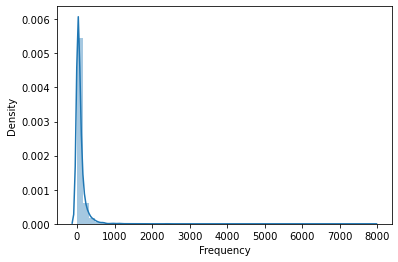

In [42]:
sns.distplot(RFMscores['Frequency']) #Frequency distribution plot

In [43]:
RFMscores['Monetary'].describe() #Descriptive statistics

count      4339.000000
mean       2053.793018
std        8988.248381
min           0.000000
25%         307.245000
50%         674.450000
75%        1661.640000
max      280206.020000
Name: Monetary, dtype: float64

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

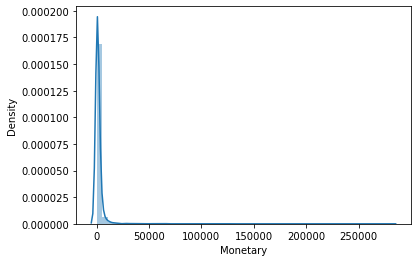

In [44]:
sns.distplot(RFMscores['Monetary']) #Monetary distribution plot

In [45]:
quantiles = RFMscores.quantile([0.25, 0.50, 0.75])
quantiles

,Recency,Frequency,Monetary
0.25,17.0,17.0,307.245
0.50,50.0,41.0,674.450
0.75,141.5,100.0,1661.640


In [46]:
#Function for Recency scoring
def Rscoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [47]:
#Function for Frequency and Monetary scoring
def FMscoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [48]:
#Calculating R, F and M segment values
RFMscores['R'] = RFMscores['Recency'].apply(Rscoring, args=('Recency', quantiles,))
RFMscores['F'] = RFMscores['Frequency'].apply(FMscoring, args=('Frequency', quantiles,))
RFMscores['M'] = RFMscores['Monetary'].apply(FMscoring, args=('Monetary', quantiles,))

In [49]:
RFMscores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [50]:
RFMscores['RFMsegment'] = RFMscores.R.map(str) + RFMscores.F.map(str) + RFMscores.M.map(str)

#Calculating total sum of R, F and M scores
RFMscores['RFMscore'] = RFMscores[['R', 'F', 'M']].sum(axis = 1)

In [51]:
RFMscores.head()

,Recency,Frequency,Monetary,R,F,M,RFMsegment,RFMscore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [52]:
cust_loyalty_labels = ['Very Loyal', 'Loyal', 'Less Loyal', 'Not Loyal'] #Assigning loyalty levels to customers
score_cut = pd.qcut(RFMscores['RFMscore'], q = 4, labels = cust_loyalty_labels)
RFMscores['RFM_Loyalty'] = score_cut.values
RFMscores

,Recency,Frequency,Monetary,R,F,M,RFMsegment,RFMscore,RFM_Loyalty
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Less Loyal
12347.0,2,182,4310.00,1,1,1,111,3,Very Loyal
12348.0,75,31,1797.24,3,3,1,331,7,Loyal
12349.0,18,73,1757.55,2,2,1,221,5,Very Loyal
12350.0,310,17,334.40,4,4,3,443,11,Not Loyal
...,...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,4,4,4,444,12,Not Loyal
18281.0,180,7,80.82,4,4,4,444,12,Not Loyal
18282.0,7,12,178.05,1,4,4,144,9,Less Loyal


In [53]:
RFMscores[RFMscores['RFMsegment']=='111'] 

,Recency,Frequency,Monetary,R,F,M,RFMsegment,RFMscore,RFM_Loyalty
CustomerID,,,,,,,,,
12347.0,2,182,4310.00,1,1,1,111,3,Very Loyal
12362.0,3,266,5226.23,1,1,1,111,3,Very Loyal
12417.0,3,192,3649.10,1,1,1,111,3,Very Loyal
12423.0,0,125,1859.31,1,1,1,111,3,Very Loyal
12433.0,0,420,13375.87,1,1,1,111,3,Very Loyal
...,...,...,...,...,...,...,...,...,...
18229.0,11,164,7276.90,1,1,1,111,3,Very Loyal
18241.0,9,104,2073.09,1,1,1,111,3,Very Loyal
18245.0,7,175,2567.06,1,1,1,111,3,Very Loyal


# Data Modelling

In [54]:
#Function for taking care of negative values
def handle_neg(x):
    if x <= 0:
        return 1
    else:
        return x
    
RFMscores['Recency'] = [handle_neg(x) for x in RFMscores.Recency]
RFMscores['Monetary'] = [handle_neg(x) for x in RFMscores.Monetary]

In [55]:
#Applying log transformation for normalizing the data
log_data = RFMscores[['Recency','Frequency','Monetary']].apply(np.log, axis=1).round(3)

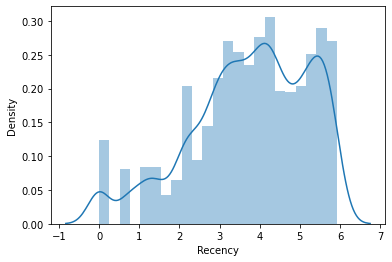

In [56]:
#Data distribution after normalization for Recency
recency_plot = log_data['Recency']
rx = sns.distplot(recency_plot)

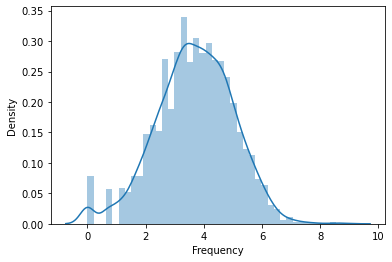

In [57]:
#Data distribution after normalization for Frequency
frequency_plot = log_data['Frequency']
fx = sns.distplot(frequency_plot)

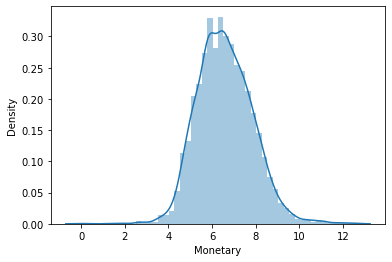

In [58]:
#Data distribution after normalization for Monetary
monetary_plot = log_data['Monetary']
mx = sns.distplot(monetary_plot)

In [59]:
#Data Scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss_data = ss.fit_transform(log_data)
ss_data = pd.DataFrame(ss_data, columns = ['Recency','Frequency','Monetary'])

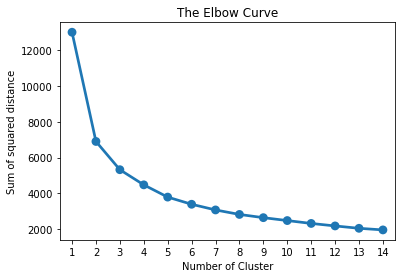

In [60]:
from sklearn.cluster import KMeans

sum_squared_dist={}
for k in range(1,15):
    kmeans=KMeans(n_clusters = k, init = 'k-means++', random_state = 0, max_iter = 1000)
    kmeans.fit(ss_data)
    sum_squared_dist[k] = kmeans.inertia_

sns.pointplot(x = list(sum_squared_dist.keys()), y = list(sum_squared_dist.values()))
plt.title('The Elbow Curve')
plt.xlabel('Number of Cluster')
plt.ylabel('Sum of squared distance')
plt.show()

In [61]:
#Model building
model = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0, max_iter = 1000)
model.fit(ss_data)

KMeans(max_iter=1000, n_clusters=3, random_state=0)

In [62]:
#Finding the cluster for each customer
RFMscores['Cluster'] = model.labels_
RFMscores.head()

,Recency,Frequency,Monetary,R,F,M,RFMsegment,RFMscore,RFM_Loyalty,Cluster
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Less Loyal,2
12347.0,2,182,4310.00,1,1,1,111,3,Very Loyal,0
12348.0,75,31,1797.24,3,3,1,331,7,Loyal,2
12349.0,18,73,1757.55,2,2,1,221,5,Very Loyal,2
12350.0,310,17,334.40,4,4,3,443,11,Not Loyal,1


In [63]:
plt.figure(figsize = (10,10))
colours = ['Red', 'Green', 'Blue']
RFMscores['Colour'] = RFMscores['Cluster'].map(lambda x: colours[x])
RFMscores

,Recency,Frequency,Monetary,R,F,M,RFMsegment,RFMscore,RFM_Loyalty,Cluster,Colour
CustomerID,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Less Loyal,2,Blue
12347.0,2,182,4310.00,1,1,1,111,3,Very Loyal,0,Red
12348.0,75,31,1797.24,3,3,1,331,7,Loyal,2,Blue
12349.0,18,73,1757.55,2,2,1,221,5,Very Loyal,2,Blue
12350.0,310,17,334.40,4,4,3,443,11,Not Loyal,1,Green
...,...,...,...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,4,4,4,444,12,Not Loyal,1,Green
18281.0,180,7,80.82,4,4,4,444,12,Not Loyal,1,Green
18282.0,7,12,178.05,1,4,4,144,9,Less Loyal,1,Green


<Figure size 720x720 with 0 Axes>

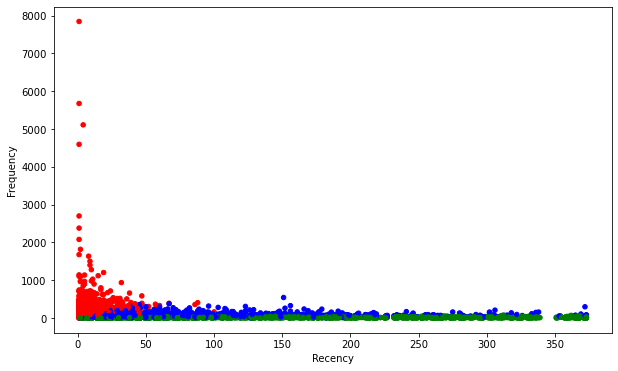

In [64]:
sct_plot = RFMscores.plot(kind = 'scatter', x = 'Recency', y = 'Frequency', c = RFMscores['Colour'], figsize = (10,6))

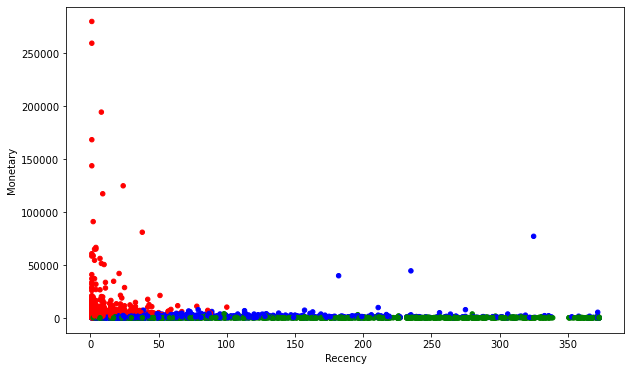

In [65]:
sct_plot1 = RFMscores.plot(kind = 'scatter', x = 'Recency', y = 'Monetary', c = RFMscores['Colour'], figsize = (10,6))

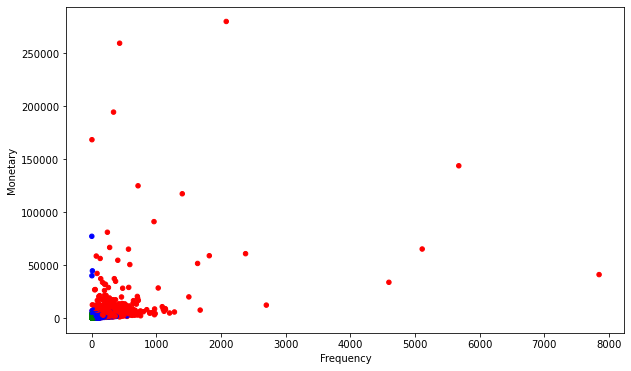

In [66]:
sct_plot2 = RFMscores.plot(kind = 'scatter', x = 'Frequency', y = 'Monetary', c = RFMscores['Colour'], figsize = (10,6))